# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [44]:
# Import your libraries
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [15]:
# Your code here
mu, sigma = 50, 5

sample_size = pd.Series([10, 50, 500, 5000, 50000])
sample_size

0       10
1       50
2      500
3     5000
4    50000
dtype: int64

In [37]:
dists = sample_size.apply(lambda s: np.random.normal(mu, sigma, s))
dist10 =  np.random.normal(mu, sigma, 10)
# 10, 50,..50000 listas de numeros  que representan la dist N(mu, sigma)
dist10

array([47.07196538, 49.22531237, 41.85693585, 50.56532773, 52.05213284,
       42.26798114, 48.95025653, 46.9908503 , 48.61420548, 48.77238385])

In [38]:
tests = dists.apply(lambda d: stats.normaltest(d))

tests

0    (1.4303838678290484, 0.48909822824936666)
1    (7.395083543964118, 0.024784377297772667)
2      (3.797778226263051, 0.1497348653608947)
3        (5.762720248684, 0.05605846447615985)
4      (3.644874779775648, 0.1616313119031158)
dtype: object

#### Interpret the normaltest results and make your observations.

existen varios datos en los que se puede aceptar la hipótesis nula, es decir, que el pvalor es mayor a 0,05 por lo que admitimos que la distribucción es normal, mientras que en el caso 1 al ser el valor 0,02 se puede rechazar la hipotesis nula por lo que podemos afirmar que la distribucción no es normal.
El caso 3 es el mas interesante puesto que el valor es 0,056, tecnicamente está por encima por lo que no podríamos rechazar la hipotesis nula, pero al estar cerca no es tán fácil admitirla.


#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

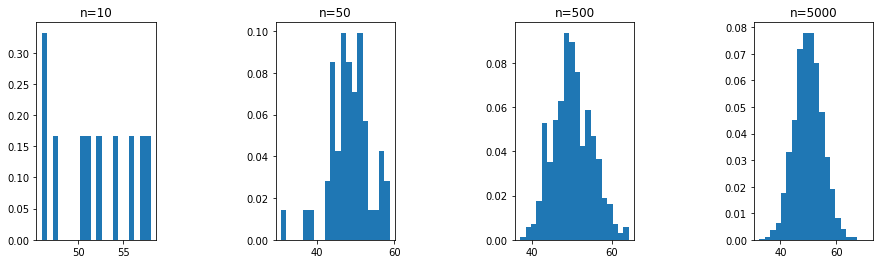

In [45]:
# Your code here
f, ax = plt.subplots(1, 4)

f.set_figwidth(15)

f.subplots_adjust(wspace=1)

for i in range(0, 4):
    ax[i].set_title('n=%s' % (sample_size[i]))
    count, bins, ignored = ax[i].hist(dists[i], 20, density=True)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

Se puede afirmar que el teorema de limete central es cierto, pues se puede ver como a mas valores en la muestra estos se van distribuyendo siguiendo un patron normal 

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

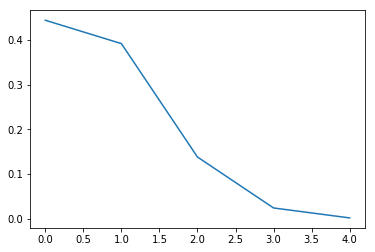

In [46]:
# Your code here
from scipy.stats import binom

n, p = 5, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### Explain what you observe from the plot above

Se puede apreciar como existe mas de un  40% de probabilidades que ninguna persona vea el anuncio, mientras que un persona vea el anuncio

#### Now plot PMP with 50, 500, and 5000 visitors.

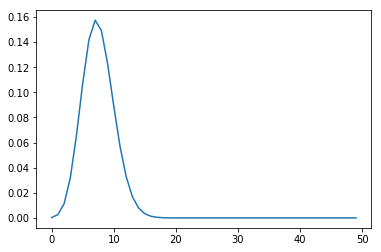

In [49]:
n, p = 50, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

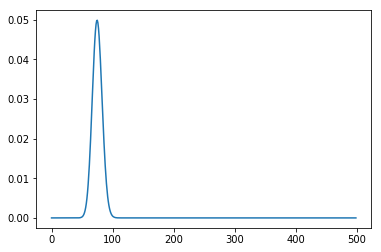

In [48]:
n, p = 500, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

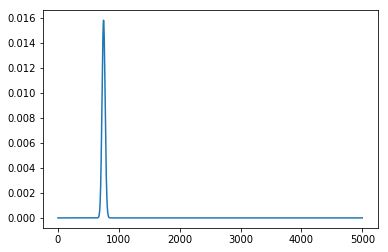

In [53]:
n, p = 5000, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

What did you notice from the distribution plots? Comment your findings.

Al aumentar el numero de casos se puede apreciar como se mantiene la normalidad de la curva y se llega a su punto máximo de media en el valor de la probabilidad de que se de ese fenomeno 

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

Se trata de una forma de distribucción mediante unos datos discretos,se mide para calcular la probabilidad de que ocurra un determinado número de eventos durante cierto período de tiempo, se utiliza sobre todo para probabilidades de sucesos raros o que no se tengan suficientes datos

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

la probabilidad de que asistan 320 personas es de 0.011612348610402475


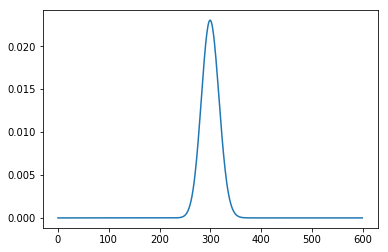

In [70]:
from scipy.stats import poisson
N = np.arange(600)

rv = poisson(300)

arr = []

for n in N:
    arr.append(rv.pmf(n))

print("la probabilidad de que asistan 320 personas es de {}".format(rv.pmf(320)))
    

    
plt.plot(arr)


#### What is the probability of getting 60 visits?

In [73]:
print("la probabilidad de que asistan 60 personas es de {}, es decir, prácticamente nula".format(rv.pmf(60)))

la probabilidad de que asistan 60 personas es de 2.622743762294515e-64, es decir, prácticamente nula


#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

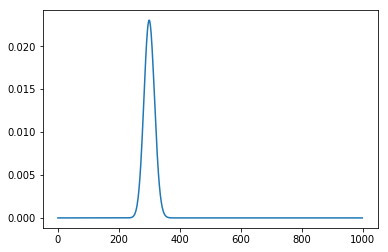

In [115]:
# your code here
from scipy.stats import poisson

N = np.arange(1000)

rv = poisson(300)

arr = []

for n in N:
    arr.append(rv.pmf(n))

plt.plot(arr)